# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings(action = 'ignore')
plt.style.use(['seaborn-bright','dark_background'])

# Importing Required Dataset

In [2]:
data = pd.read_csv('Raw_Housing_Prices1.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


## Cheacking null values in dataset

In [3]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [4]:
data.dropna(inplace=True,axis=0,subset=['Sale Price'])

In [5]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


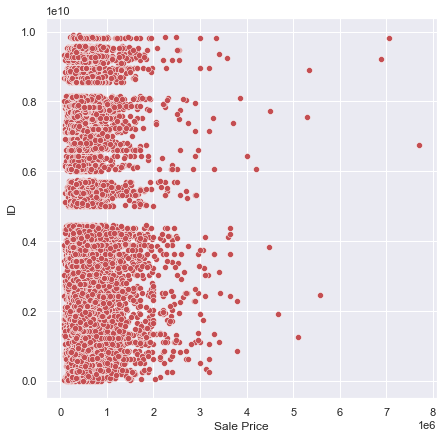

In [6]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.scatterplot(x = 'Sale Price',y = 'ID',data = data,color ='r')
plt.show()

In [7]:
q1 = data['Sale Price'].quantile(0.25)
q3 = data['Sale Price'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

## Treating Outliers

In [8]:
def outlier(value):
    if value > upper_limit:
        return upper_limit
    elif value < lower_limit:
        return lower_limit
    else:
        return value
data['Sale Price'] = data['Sale Price'].apply(outlier)
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [10]:
numeric = ['No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
        'Area of the House from Basement (in Sqft)', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)']

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy='mean')
data[numeric] = imputer.fit_transform(data[numeric])

In [12]:
data['Zipcode'] = data['Zipcode'].astype(object)

In [13]:
data['Zipcode'].shape

(21609,)

In [14]:
column = data['Zipcode'].values.reshape(-1,1)
column.shape

(21609, 1)

In [15]:
imputer = SimpleImputer(missing_values = np.nan,strategy='most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [17]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074,47.6168,-122.045,1800.0,7503


In [18]:
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [19]:
mapping = {'None':0,'Once':1,
          'Twice':2,'Thrice':3,
          'Four':4}

In [20]:
data['No of Times Visited'] = data['No of Times Visited'].map(mapping)
data['No of Times Visited'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [21]:
data['Waterfront View'] = np.where(data['Waterfront View']=='Yes',1,0)
data['Waterfront View'].unique()

array([0, 1])

In [22]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [23]:
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year

In [24]:
data['Ever Renovated'] = np.where(data['Renovated Year']==0,'Yes','No')

In [25]:
data['years_since_renovation'] = np.where(data['Ever Renovated']=='Yes',
                                         abs(data['Purchase Year']-data['Renovated Year']),0)

In [26]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Purchase Year,Ever Renovated,years_since_renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,63,0,98178,47.5112,-122.257,1340.0,5650,2017,Yes,2017
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,67,1991,98125,47.7210,-122.319,1690.0,7639,2017,No,0
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,85,0,98028,47.7379,-122.233,2720.0,8062,2016,Yes,2016
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,53,0,98136,47.5208,-122.393,1360.0,5000,2017,Yes,2017
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,31,0,98074,47.6168,-122.045,1800.0,7503,2016,Yes,2016


In [27]:
data = data.drop(columns = ['ID','Date House was Sold','Renovated Year','Purchase Year'])

In [28]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,years_since_renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,Fair,7,1180.0,0,63,98178,47.5112,-122.257,1340.0,5650,Yes,2017
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,Fair,7,2170.0,400,67,98125,47.7210,-122.319,1690.0,7639,No,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,Fair,6,770.0,0,85,98028,47.7379,-122.233,2720.0,8062,Yes,2016
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,Excellent,7,1050.0,910,53,98136,47.5208,-122.393,1360.0,5000,Yes,2017
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,Fair,8,1680.0,0,31,98074,47.6168,-122.045,1800.0,7503,Yes,2016


##  Cheacking correlation between various features

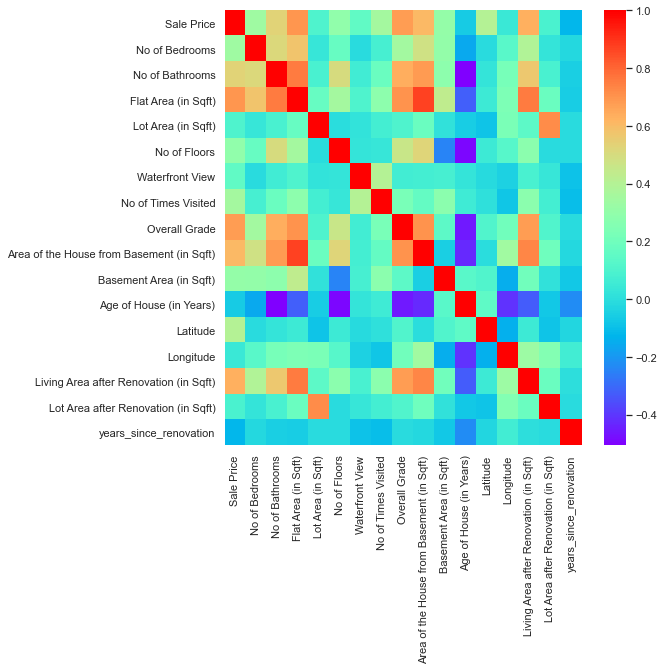

In [29]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.heatmap(data.corr(),cmap="rainbow")
plt.show()

In [30]:
ziptable = data.groupby('Zipcode').agg({'Sale Price':'mean'}).sort_values('Sale Price',ascending = True)
ziptable.head()

,Sale Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [31]:
data['Zipcode_tabel'] = pd.cut(data['Sale Price'],bins = 10,
                              labels = ['ZipGroup_0',
                                       'ZipGroup_1',
                                       'ZipGroup_2',
                                       'ZipGroup_3',
                                       'ZipGroup_4',
                                       'ZipGroup_5',
                                       'ZipGroup_6',
                                       'ZipGroup_7',
                                       'ZipGroup_8',
                                       'ZipGroup_9'],
                               include_lowest = True)

In [32]:
ziptable = ziptable.drop(columns=['Sale Price'],axis = 1)

In [33]:
data = pd.merge(data,ziptable,left_on = 'Zipcode',how = 'left',right_index = True)
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,...,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,years_since_renovation,Zipcode_tabel
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,Fair,7,...,0,63,98178,47.5112,-122.257,1340.0,5650,Yes,2017,ZipGroup_1
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,Fair,7,...,400,67,98125,47.7210,-122.319,1690.0,7639,No,0,ZipGroup_4
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,Fair,6,...,0,85,98028,47.7379,-122.233,2720.0,8062,Yes,2016,ZipGroup_0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,Excellent,7,...,910,53,98136,47.5208,-122.393,1360.0,5000,Yes,2017,ZipGroup_5
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,Fair,8,...,0,31,98074,47.6168,-122.045,1800.0,7503,Yes,2016,ZipGroup_4


## Making dummy variables

In [34]:
data = pd.get_dummies(data,
                      columns=['Condition of the House','Zipcode_tabel','Ever Renovated','Waterfront View'],
                      drop_first=True)
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode_tabel_ZipGroup_2,Zipcode_tabel_ZipGroup_3,Zipcode_tabel_ZipGroup_4,Zipcode_tabel_ZipGroup_5,Zipcode_tabel_ZipGroup_6,Zipcode_tabel_ZipGroup_7,Zipcode_tabel_ZipGroup_8,Zipcode_tabel_ZipGroup_9,Ever Renovated_Yes,Waterfront View_1
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,1,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,0,0,0,0,0,0,1,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,1,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,1,0,0,0,0,0,1,0


In [35]:
data = data.drop(columns=['Zipcode'])

## Dividing test and train data

In [36]:
X = data.drop(columns=['Sale Price'])
Y = data['Sale Price']

### Scaling Test data

In [37]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
column = X.columns
scaled_X = scale.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns=column)
scaled_X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Zipcode_tabel_ZipGroup_2,Zipcode_tabel_ZipGroup_3,Zipcode_tabel_ZipGroup_4,Zipcode_tabel_ZipGroup_5,Zipcode_tabel_ZipGroup_6,Zipcode_tabel_ZipGroup_7,Zipcode_tabel_ZipGroup_8,Zipcode_tabel_ZipGroup_9,Ever Renovated_Yes,Waterfront View_1
0,-0.398724,-1.447497,-0.979989,-0.228368,-0.915389,-0.30579,-0.563993,-0.734765,-0.658697,0.544734,...,-0.51379,-0.470091,-0.406859,-0.317337,-0.266406,-0.205674,-0.15872,-0.265108,0.210155,-0.087181
1,-0.398724,0.175717,0.533645,-0.189935,0.936817,-0.30579,-0.563993,0.460954,0.245134,0.680915,...,-0.51379,-0.470091,2.457856,-0.317337,-0.266406,-0.205674,-0.15872,-0.265108,-4.758385,-0.087181
2,-1.474115,-1.447497,-1.426456,-0.123352,-0.915389,-0.30579,-1.468566,-1.229961,-0.658697,1.293731,...,-0.51379,-0.470091,-0.406859,-0.317337,-0.266406,-0.205674,-0.15872,-0.265108,0.210155,-0.087181
3,0.676667,1.149646,-0.130612,-0.244060,-0.915389,-0.30579,-0.563993,-0.891778,1.397518,0.204281,...,-0.51379,-0.470091,-0.406859,3.151222,-0.266406,-0.205674,-0.15872,-0.265108,0.210155,-0.087181
4,-0.398724,-0.148926,-0.435516,-0.169704,-0.915389,-0.30579,0.340581,-0.130866,-0.658697,-0.544715,...,-0.51379,-0.470091,2.457856,-0.317337,-0.266406,-0.205674,-0.15872,-0.265108,0.210155,-0.087181


## Importing train test split

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(scaled_X,Y,test_size = 0.2,random_state = 101)

In [39]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((17287, 30), (4322, 30), (17287,), (4322,))

## Importing various Regression Models

In [40]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [41]:
model = []
model.append(("Linear",LinearRegression()))
model.append(("Lasso",Lasso()))
model.append(("Ridge",Ridge()))
model.append(("RandomForest",RandomForestRegressor()))
model.append(("AdaBoost",AdaBoostRegressor()))
model.append(("Bagging",BaggingRegressor()))
model.append(("ExtraTrees",ExtraTreesRegressor()))
model.append(("KNeighbours",KNeighborsRegressor()))
model.append(("DescisionTree",DecisionTreeRegressor()))

In [42]:
model_score = []
for name,mod in model:
    mod.fit(X_train,Y_train)
    score = mod.score(X_test,Y_test)
    model_score.append((name,score))
    print(name,"Regression score =",score)

Linear Regression score = 0.9874946867909836
Lasso Regression score = 0.987490000255369
Ridge Regression score = 0.9874911748277315
RandomForest Regression score = 0.9862954194904548
AdaBoost Regression score = 0.8780680553890128
Bagging Regression score = 0.9831753840653645
ExtraTrees Regression score = 0.9889097067863769
KNeighbours Regression score = 0.9822795157388508
DescisionTree Regression score = 0.9727116326957922


In [43]:
df = pd.DataFrame(model_score,columns=['model','score']).sort_values(by = 'score')

In [44]:
df1 = df.reset_index()
df1 = df1.drop(columns=['index'])

## Ploting graph for model's score

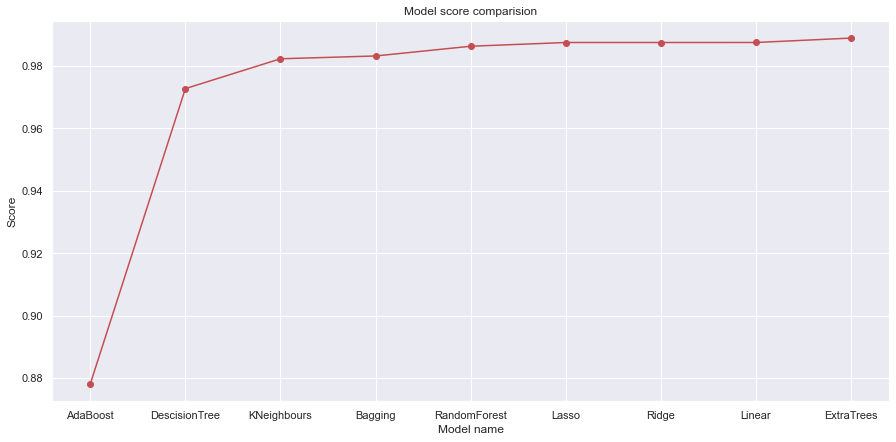

In [45]:
plt.figure(figsize=(15,7))
plt.plot(df1['model'],df1['score'],'r-o')
plt.title("Model score comparision")
plt.xlabel("Model name")
plt.ylabel("Score")
plt.show()